<a href="https://colab.research.google.com/github/mfaisalr29/uts_machine_learning/blob/main/Muhammad%20Faisal%20Ramadhan%20UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn seaborn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


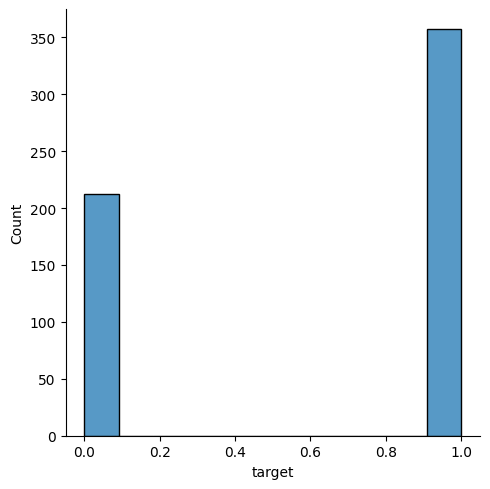

In [ ]:
import seaborn as sns

# Convert dataset into a Pandas DataFrame
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
sns.displot(data=df, x="target")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)


Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        63
         1.0       0.96      0.92      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



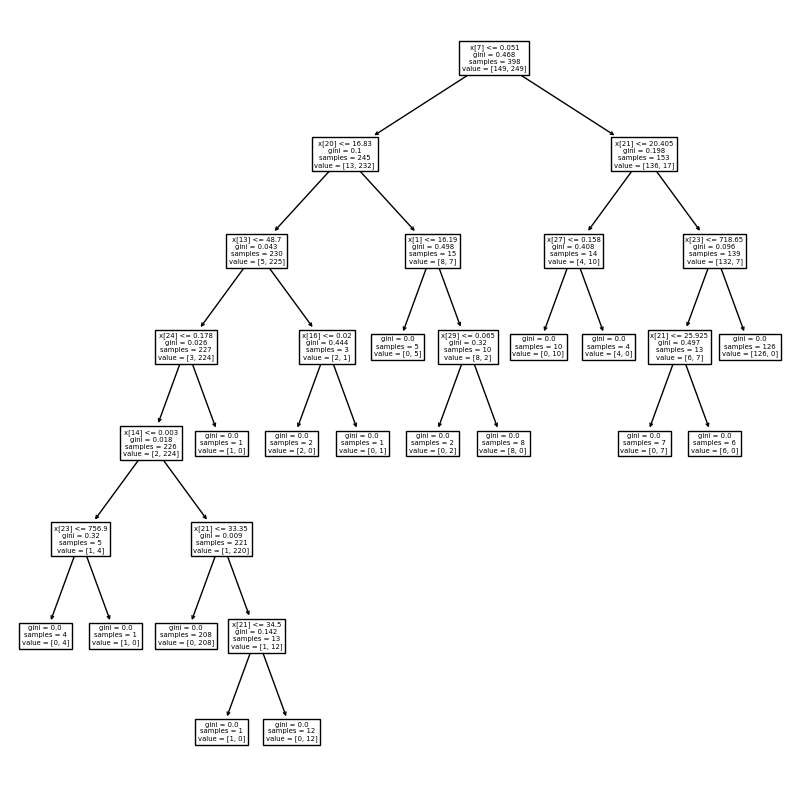

Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        63
         1.0       0.97      0.98      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



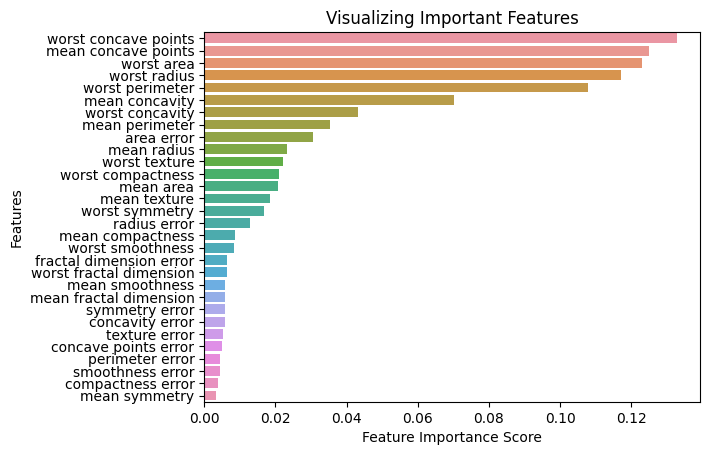

Classification Report - Self-Training
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90        63
         1.0       0.96      0.92      0.94       108

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.92       171



/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


In [10]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import classification_report

# Load the Dataset
cancer = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

# Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(df[cancer['feature_names']], df['target'], test_size = 0.3, random_state = 42)

# Decision Tree
# Create the Classifier
dt = DecisionTreeClassifier()

# Train the Classifier
dt_model = dt.fit(X_train, y_train)

# Test the Classifier
y_pred = dt_model.predict(X_test)

# Print Classification Report
print("Classification Report - Decision Tree")
print(classification_report(y_test, y_pred))

# Visualize Decision Tree
plt.figure(figsize=(10,10))
tree.plot_tree(dt_model)
plt.show()

# Random Forest
# Create the Classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the Classifier
rf_model = rf.fit(X_train, y_train)

# Test the Classifier
y_pred = rf_model.predict(X_test)

# Print Classification Report
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred))

# Visualize Feature Importance
feature_imp = pd.Series(rf_model.feature_importances_, index=cancer.feature_names).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Self-Training
# Create the Classifier
st = SelfTrainingClassifier(DecisionTreeClassifier(), criterion='threshold', threshold=0.8)

# Train the Classifier
st_model = st.fit(X_train, y_train)

# Test the Classifier
y_pred = st_model.predict(X_test)

# Print Classification Report
print("Classification Report - Self-Training")
print(classification_report(y_test, y_pred))
